In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('AgathaChristieRawData.csv')

In [42]:
# Replace '1' with 'Male' and '0' with 'Female' in the 'gender' column
df['Gender'] = df['Gender'].replace({1: 'Male', 0: 'Female'})

In [43]:
# Create a new column for each method and set it to 1 if the method is used, 0 otherwise
methods = ['Poisoned', 'Stabbed', 'Shot', 'BluntInstrument', 'Strangulation', 'Other']
for method in methods:
    df[method] = df[method].astype(int)

# Melt the DataFrame to long format for easier plotting
df_long = pd.melt(df, id_vars=['Gender'], value_vars=methods, var_name='Method', value_name='Used')

# Group by Method and Gender, and calculate the percentage of each gender for each method
method_gender_percentages = df_long.groupby(['Method', 'Gender'])['Used'].mean().unstack() * 100



<Figure size 1200x800 with 0 Axes>

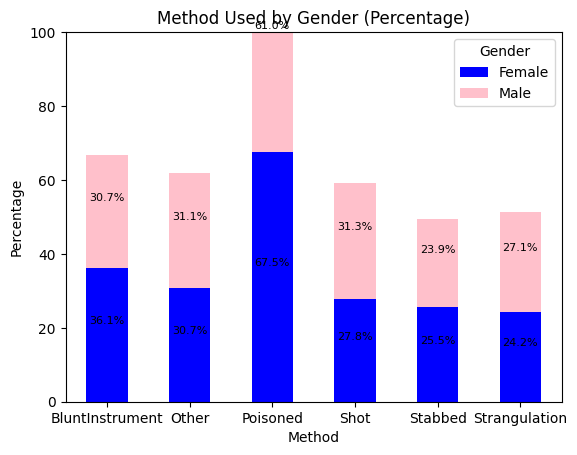

In [44]:

# Plotting
plt.figure(figsize=(12, 8))
ax = method_gender_percentages.plot(kind='bar', stacked=True, color=['blue', 'pink'])

# Add text annotations for percentage values on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=8, color='black')

plt.title('Method Used by Gender (Percentage)')
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages
plt.show()